In [34]:
import pandas as pd
df = pd.read_csv('fashion_products.csv')
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [35]:
df.groupby('Size')[('Size')].count()

Size
L     251
M     246
S     249
XL    254
Name: Size, dtype: int64

In [36]:
df.groupby(['Brand', 'Size'])[('Size')].count()

Brand   Size
Adidas  L       50
        M       54
        S       50
        XL      44
Gucci   L       48
        M       50
        S       44
        XL      49
H&M     L       51
        M       37
        S       54
        XL      52
Nike    L       54
        M       46
        S       54
        XL      60
Zara    L       48
        M       59
        S       47
        XL      49
Name: Size, dtype: int64

In [37]:
pd.set_option('display.max_rows', None)
df.groupby(['Brand', 'Color', 'Size', 'Product Name'])[('Product Name')].count()


Brand   Color   Size  Product Name
Adidas  Black   L     Jeans           1
                      Shoes           3
                      Sweater         1
                      T-shirt         1
                M     Dress           1
                      Jeans           2
                      Shoes           3
                      Sweater         1
                      T-shirt         1
                S     Dress           1
                      Jeans           1
                      Shoes           2
                      Sweater         1
                      T-shirt         3
                XL    Dress           2
                      Jeans           3
                      Sweater         1
                      T-shirt         1
        Blue    L     Dress           5
                      Jeans           3
                      Sweater         3
                      T-shirt         1
                M     Dress           1
                      Shoes           5
     

In [38]:
df.groupby('Product Name')['Price'].mean()

Product Name
Dress      53.289773
Jeans      56.696970
Shoes      56.738739
Sweater    54.788235
T-shirt    56.711443
Name: Price, dtype: float64

In [39]:
df.groupby('Brand')['Price'].mean()

Brand
Adidas    53.515152
Gucci     55.429319
H&M       57.567010
Nike      57.570093
Zara      54.748768
Name: Price, dtype: float64

In [40]:
df.groupby('Product Name')['Rating'].mean() 

Product Name
Dress      3.015601
Jeans      2.974159
Shoes      2.903501
Sweater    3.158028
T-shirt    2.954809
Name: Rating, dtype: float64

In [41]:
df.groupby('Brand')['Rating'].mean() 

Brand
Adidas    2.942720
Gucci     3.162277
H&M       2.996309
Nike      2.877917
Zara      3.001594
Name: Rating, dtype: float64

In [42]:
df.groupby(['Category', 'Color', 'Size'])[('Price')].mean()

Category         Color   Size
Kids' Fashion    Black   L       56.785714
                         M       69.692308
                         S       48.550000
                         XL      64.692308
                 Blue    L       51.071429
                         M       57.357143
                         S       50.764706
                         XL      57.470588
                 Green   L       52.090909
                         M       60.928571
                         S       48.111111
                         XL      60.666667
                 Red     L       52.210526
                         M       59.100000
                         S       55.600000
                         XL      62.125000
                 White   L       63.045455
                         M       61.000000
                         S       53.375000
                         XL      60.500000
                 Yellow  L       57.647059
                         M       60.882353
                        

In [43]:
df.groupby(['Product Name', 'Color'])[('Price')].mean()

Product Name  Color 
Dress         Black     44.666667
              Blue      49.634146
              Green     62.000000
              Red       54.045455
              White     59.083333
              Yellow    51.354839
Jeans         Black     62.135135
              Blue      55.088235
              Green     54.511628
              Red       55.176471
              White     55.512821
              Yellow    57.727273
Shoes         Black     58.526316
              Blue      50.441176
              Green     58.941176
              Red       60.472222
              White     60.488889
              Yellow    50.114286
Sweater       Black     52.800000
              Blue      57.272727
              Green     52.333333
              Red       55.680000
              White     48.653846
              Yellow    59.216216
T-shirt       Black     60.766667
              Blue      60.366667
              Green     56.151515
              Red       54.060606
              White     54.

In [45]:
df_cat = df.select_dtypes('object')
df_cat.head()

,Product Name,Brand,Category,Color,Size
0,Dress,Adidas,Men's Fashion,Black,XL
1,Shoes,H&M,Women's Fashion,Black,L
2,Dress,Adidas,Women's Fashion,Yellow,XL
3,Shoes,Zara,Men's Fashion,White,S
4,T-shirt,Adidas,Men's Fashion,Black,M


In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns 

le = LabelEncoder()
le

LabelEncoder()

In [47]:
df['Product Name Cat'] = le.fit_transform(df_cat['Product Name'])
df['Brand Cat'] = le.fit_transform(df_cat['Brand'])
df['Category Cat'] = le.fit_transform(df_cat['Category'])
df['Color Cat'] = le.fit_transform(df_cat['Color'])
df['Size Cat'] = le.fit_transform(df_cat['Size'])

In [48]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size,Product Name Cat,Brand Cat,Category Cat,Color Cat,Size Cat
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL,0,0,1,0,3
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L,2,2,2,0,0
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL,0,0,2,5,3
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S,2,4,1,4,2
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M,4,0,1,0,1
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L,0,0,1,5,0
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL,1,1,1,4,3
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL,3,4,0,1,3
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL,3,2,1,2,3
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL,4,4,0,4,3


In [49]:
df_encoded = df.drop(['Product Name', 'Brand', 'Category', 'Color', 'Size'], axis=1)
df_encoded

,User ID,Product ID,Price,Rating,Product Name Cat,Brand Cat,Category Cat,Color Cat,Size Cat
0,19,1,40,1.043159,0,0,1,0,3
1,97,2,82,4.026416,2,2,2,0,0
2,25,3,44,3.337938,0,0,2,5,3
3,57,4,23,1.049523,2,4,1,4,2
4,79,5,79,4.302773,4,0,1,0,1
5,98,6,47,1.379566,0,0,1,5,0
6,16,7,37,1.356750,1,1,1,4,3
7,63,8,64,4.360303,3,4,0,1,3
8,96,9,53,4.466182,3,2,1,2,3
9,36,10,55,4.093234,4,4,0,4,3


In [50]:
df_encoded.corr()

,User ID,Product ID,Price,Rating,Product Name Cat,Brand Cat,Category Cat,Color Cat,Size Cat
User ID,1.000000,-0.021075,0.003363,0.044837,0.072779,-0.044546,0.033622,0.062598,0.008795
Product ID,-0.021075,1.000000,0.034602,0.033896,0.074302,0.002932,-0.055476,-0.080707,-0.012159
Price,0.003363,0.034602,1.000000,0.033927,0.023980,0.024924,0.007852,-0.004479,0.013825
Rating,0.044837,0.033896,0.033927,1.000000,0.005715,-0.020550,-0.013118,0.029466,0.004343
Product Name Cat,0.072779,0.074302,0.023980,0.005715,1.000000,-0.006966,-0.097844,0.009018,-0.030586
Brand Cat,-0.044546,0.002932,0.024924,-0.020550,-0.006966,1.000000,-0.015612,0.022537,0.017165
Category Cat,0.033622,-0.055476,0.007852,-0.013118,-0.097844,-0.015612,1.000000,0.044545,0.027216
Color Cat,0.062598,-0.080707,-0.004479,0.029466,0.009018,0.022537,0.044545,1.000000,-0.019712
Size Cat,0.008795,-0.012159,0.013825,0.004343,-0.030586,0.017165,0.027216,-0.019712,1.000000


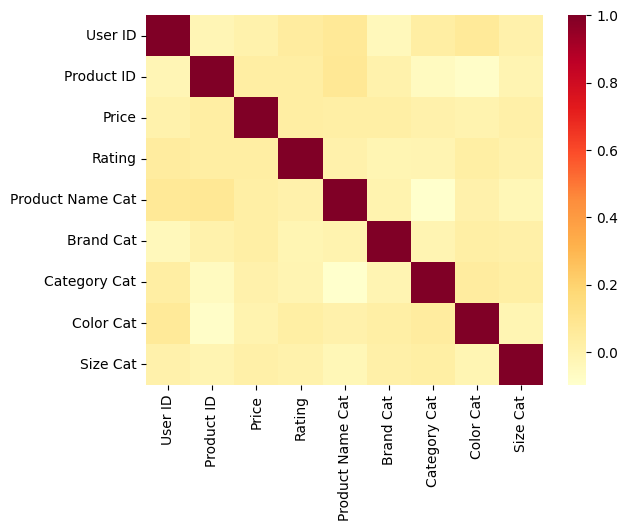

In [51]:
import matplotlib.pyplot as plt
sns.heatmap(df_encoded.corr(), cmap='YlOrRd')
plt.show()

In [71]:
df1 = df.groupby('Category')[('Price')].mean()
df1

Category
Kids' Fashion      56.512821
Men's Fashion      53.670807
Women's Fashion    57.085627
Name: Price, dtype: float64

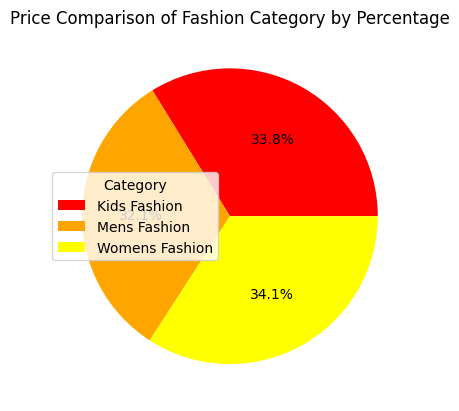

In [84]:
labels = ['Kids Fashion', 'Mens Fashion', 'Womens Fashion']
color = ['red', 'orange', 'yellow']
plt.pie(df.groupby('Category')[('Price')].mean(), autopct='%1.1f%%', colors=color)
plt.legend(title='Category', labels=labels)
plt.title('Price Comparison of Fashion Category by Percentage')
plt.show()

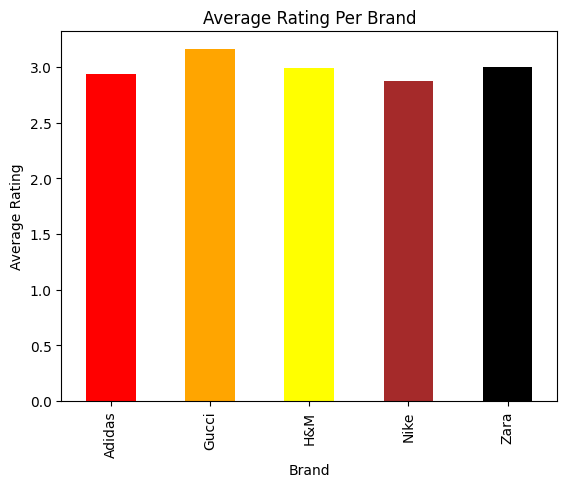

In [82]:
color = ['red', 'orange', 'yellow', 'brown', 'black']
df.groupby('Brand')['Rating'].mean().plot(kind='bar', color=color)
plt.ylabel('Average Rating')
plt.title('Average Rating Per Brand')
plt.show()